In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/aviachipta/train_data.csv")
data = pd.read_csv("/content/aviachipta/test_data.csv")

In [ ]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [ ]:
df.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5000 non-null   int64  
 1   airline           5000 non-null   object 
 2   flight            5000 non-null   object 
 3   source_city       5000 non-null   object 
 4   departure_time    5000 non-null   object 
 5   stops             5000 non-null   object 
 6   arrival_time      5000 non-null   object 
 7   destination_city  5000 non-null   object 
 8   class             5000 non-null   object 
 9   duration          5000 non-null   float64
 10  days_left         5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB


In [ ]:
df.corrwith(df['price'])

id          -0.002443
duration     0.213158
days_left   -0.102545
price        1.000000
dtype: float64

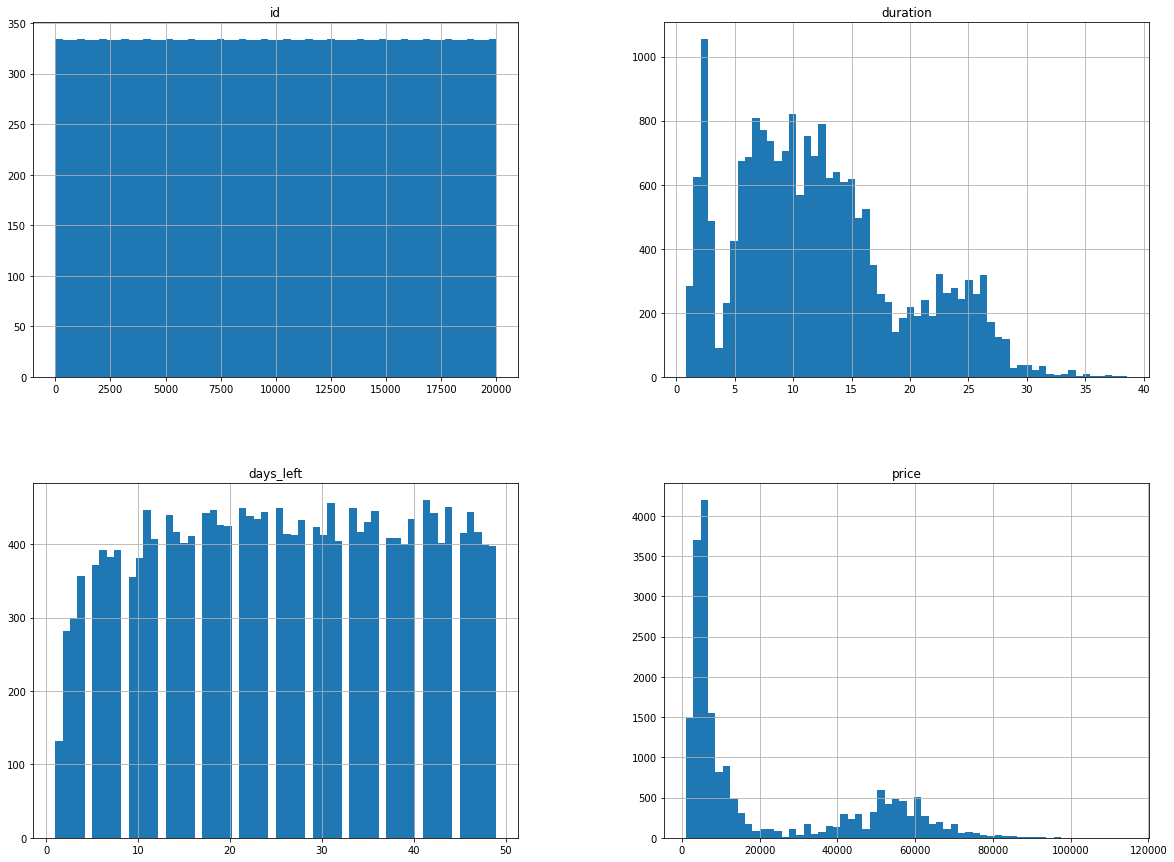

In [ ]:
%matplotlib inline
df.hist(bins=60, figsize=(20,15))
plt.show()

In [ ]:
df[(df['price']>95000)]

(12, 12)

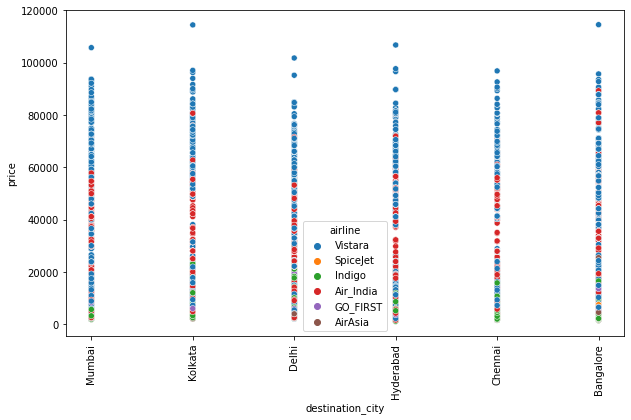

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['destination_city'], y=df['price'], hue=df['airline'])
plt.xticks(rotation=90)
plt.show()

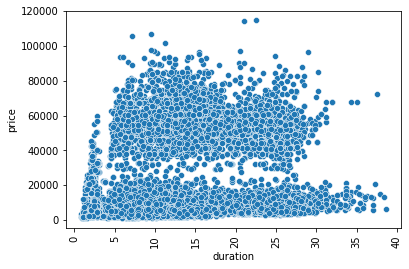

In [ ]:
sns.scatterplot(x=df['duration'], y=df['price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

df = df[(df['price']<95000)]
X = df.drop(['price', 'id'], axis=1)
y = df.price

# X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=48)

cat_cols = [cname for cname in X.columns if df[cname].dtype=='object' and df[cname].nunique()<10]
num_cols = [cname for cname in X.columns if df[cname].dtype in (['int64', 'float64'])]

In [ ]:
cat_cols

['airline',
 'source_city',
 'departure_time',
 'stops',
 'destination_city',
 'class']

In [ ]:
my_cols = cat_cols + num_cols
# X_train = X_train_full[my_cols].copy()
# X_valid = X_valid_full[my_cols].copy()
X_train = X[my_cols].copy()
X_valid = data[my_cols].copy()

In [ ]:
X_train.shape

(19988, 10)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
S_scaler = StandardScaler()

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[cat_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[cat_cols]))

S_cols_train = pd.DataFrame(S_scaler.fit_transform(X_train[num_cols]))
S_cols_valid = pd.DataFrame(S_scaler.transform(X_valid[num_cols]))

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

S_cols_train.index = X_train.index
S_cols_valid.index = X_valid.index

S_cols_train.columns = [35, 36]
S_cols_valid.columns = [35, 36]


# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([S_cols_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([S_cols_valid, OH_cols_valid], axis=1)

In [ ]:
OH_X_valid.head()

,35,36,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,34
0,2.245689,-1.757455,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.231097,0.592107,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.421651,0.298412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.978776,0.004717,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.580367,0.665531,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return preds

In [ ]:
bashorat = pd.DataFrame(score_dataset(OH_X_train, OH_X_valid, y))

In [ ]:
bashorat['id'] = data.id

In [ ]:
bashorat.columns = ['price', 'id']

In [ ]:
bashorat.index=bashorat.id

In [ ]:
bashorat.drop('id', axis=1, inplace=True)

In [ ]:
bashorat.head()
bashorat.to_csv('yechim.csv')